**GROUP SEGMENTATION**

*From an applied perspective, the ability to segment members into groups
based on similarity and without any guidance from labels is very powerful.
For example, such a technique could be applied to find different consumer
groups for online retailers, customizing a marketing strategy for each of the
distinct groups (i.e., budget shoppers, fashionistas, sneakerheads, techies,
audiophiles, etc.). Group segmentation could improve targeting in online
advertising and improve recommendations in recommender systems for
movies, music, news, social networking, dating, etc.*

**LENDING DATA CLUB**

*For this task, we will use loan data from Lending Club, a US peer-to-peer
lending company. Borrowers on the platform can borrow between $1,000 to
$40,000 in the form of unsecured personal loans, for a term of either three or
five years.
Investors can browse the loan applications and choose to finance the loans
based on the credit history of the borrower, the amount of the loan, the loan
grade, and the purpose of the loan. Investors earn money through interest paid
on the loans, and Lending Club makes money from loan origination fees and
service charges.*

*The loan data we will use is from 2007–2011 and is publicly available on
the Lending Club website.*

**IMPORT THE RELEVANT LIBRARIES**

In [1]:
# main libraries
import numpy as np
import pandas as pd
import os, time
import pickle
import gzip
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
color = sns.color_palette()
# scikitlearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report,average_precision_score,roc_curve, auc,roc_auc_score
# cikitlearn libraries models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist

**READ THE DATASET**

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('LoanStats3a.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_1756\1970798362.py:2: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('LoanStats3a.csv')


In [3]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-15,171.62,NaN,Jun-18,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,300

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

**SELECT THE FEATURES TO WORK WITH**

In [5]:
columns_to_work_with = ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade',
                        'emp_length','home_ownership','annual_inc','verification_status','pymnt_plan','purpose','addr_state',
                        'dti','delinq_2yrs','earliest_cr_line','mths_since_last_delinq','mths_since_last_record','open_acc',
                        'pub_rec','revol_bal','revol_util','total_acc','initial_list_status','out_prncp','out_prncp_inv',
                        'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                        'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']

In [6]:
df = df.loc[:,columns_to_work_with]

In [7]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,Jan-85,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,Apr-99,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,Nov-01,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,n,other,CA,20.00,0.0,Feb-96,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,n,other,OR,17.94,0.0,Jan-96,38.0,NaN,15.0,0.0,27783.0,53.90%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,10+ years,MORTGAGE,70000.0,Not Verified,n,other,CT,8.81,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,5619.762090,0.00,5000.00,619.76,0.00,0.0,0.00,Jun-10,156.39
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**PERFROM EXPLORATORY DATA ANALYSIS** 

In [8]:
df.shape

(42542, 37)

**TRANSFORM STRING FORMAT TO NUMERICAL FORMAT FOR SOME FEATURES**

*A few of the features like the term of the loan, the interest rate of the loan,
employment length of the borrower, and revolving utilization of the borrower
need to be altered from a string format to a numerical format.
For our clustering application, we will consider just the numerical features
and ignore all the categorical features because nonnumerical features cannot
be handled by our clustering algorithms in their current form.*

In [9]:
import re

for col_name in ["term","int_rate","emp_length","revol_util"]:
    df.loc[:,col_name] = df.loc[:,col_name].apply(lambda x: re.sub("[^0-9]","",str(x)))
    df.loc[:,col_name] = pd.to_numeric(df.loc[:,col_name])

In [10]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,5000.0,5000.0,4975.0,36.0,1065.0,162.87,B,B2,10.0,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,Jan-85,NaN,NaN,3.0,0.0,13648.0,8370.0,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62
1,2500.0,2500.0,2500.0,60.0,1527.0,59.83,C,C4,1.0,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,Apr-99,NaN,NaN,3.0,0.0,1687.0,940.0,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66
2,2400.0,2400.0,2400.0,36.0,1596.0,84.33,C,C5,10.0,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,Nov-01,NaN,NaN,2.0,0.0,2956.0,9850.0,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91
3,10000.0,10000.0,10000.0,36.0,1349.0,339.31,C,C1,10.0,RENT,49200.0,Source Verified,n,other,CA,20.00,0.0,Feb-96,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48
4,3000.0,3000.0,3000.0,60.0,1269.0,67.79,B,B5,1.0,RENT,80000.0,Source Verified,n,other,OR,17.94,0.0,Jan-96,38.0,NaN,15.0,0.0,27783.0,5390.0,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,5000.0,5000.0,0.0,36.0,775.0,156.11,A,A3,10.0,MORTGAGE,70000.0,Not Verified,n,other,CT,8.81,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,5619.762090,0.00,5000.00,619.76,0.00,0.0,0.00,Jun-10,156.39
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**FILL IN MISSING VALUES**

In [11]:
# Determine which features are numerical
numerical_features = []

for x in df.columns:
    if df[x].dtype != 'object':
        numerical_features.append(x)

In [12]:
numerical_features

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt']

In [13]:
# Observe the features with NaN
NaN_counter = np.isnan(df.loc[:,numerical_features]).sum()

In [14]:
NaN_counter

loan_amnt                      7
funded_amnt                    7
funded_amnt_inv                7
installment                    7
annual_inc                    11
dti                            7
delinq_2yrs                   36
mths_since_last_delinq     26933
mths_since_last_record     38891
open_acc                      36
pub_rec                       36
revol_bal                      7
total_acc                     36
out_prncp                      7
out_prncp_inv                  7
total_pymnt                    7
total_pymnt_inv                7
total_rec_prncp                7
total_rec_int                  7
total_rec_late_fee             7
recoveries                     7
collection_recovery_fee        7
last_pymnt_amnt                7
dtype: int64

*Replace NaN Values*

*Most features have a few NaNs, and some—such as the months since last
delinquency and last change in record—have many.
Let’s impute these so we do not have to deal with any NaNs during the
clustering process:*

In [15]:
fill_with_mean = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc',
                  'dti','open_acc','revol_bal','total_acc','out_prncp','out_prncp_inv',
                  'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt']

In [16]:
fill_with_zero = ['delinq_2yrs','mths_since_last_delinq',
                  'mths_since_last_record','pub_rec','total_rec_late_fee',
                  'recoveries','collection_recovery_fee']

In [17]:
from sklearn import impute

In [18]:
im = impute.SimpleImputer(strategy='mean')
df.loc[:,fill_with_mean] = im.fit_transform(df[fill_with_mean])

In [19]:
df.loc[:,fill_with_zero] = df.loc[:,fill_with_zero].fillna(value=0,axis=1)

In [20]:
# recalculate the NaNs to make sure no NaNs remain.
NaN_counter = np.isnan(df.loc[:,numerical_features]).sum()

In [21]:
NaN_counter

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
installment                0
annual_inc                 0
dti                        0
delinq_2yrs                0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
dtype: int64

In [22]:
pd.set_option('display.max_columns', None)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,5000.000000,5000.000000,4975.000000,36.0,1065.0,162.870000,B,B2,10.0,RENT,24000.00000,Verified,n,credit_card,AZ,27.650000,0.0,Jan-85,0.0,0.0,3.000000,0.0,13648.000000,8370.0,9.000000,f,0.0,0.0,5863.155187,5833.840000,5000.000000,863.160000,0.00,0.0,0.00,Jan-15,171.620000
1,2500.000000,2500.000000,2500.000000,60.0,1527.0,59.830000,C,C4,1.0,RENT,30000.00000,Source Verified,n,car,GA,1.000000,0.0,Apr-99,0.0,0.0,3.000000,0.0,1687.000000,940.0,4.000000,f,0.0,0.0,1014.530000,1014.530000,456.460000,435.170000,0.00,122.9,1.11,Apr-13,119.660000
2,2400.000000,2400.000000,2400.000000,36.0,1596.0,84.330000,C,C5,10.0,RENT,12252.00000,Not Verified,n,small_business,IL,8.720000,0.0,Nov-01,0.0,0.0,2.000000,0.0,2956.000000,9850.0,10.000000,f,0.0,0.0,3005.666844,3005.670000,2400.000000,605.670000,0.00,0.0,0.00,Jun-14,649.910000
3,10000.000000,10000.000000,10000.000000,36.0,1349.0,339.310000,C,C1,10.0,RENT,49200.00000,Source Verified,n,other,CA,20.000000,0.0,Feb-96,35.0,0.0,10.000000,0.0,5598.000000,21.0,37.000000,f,0.0,0.0,12231.890000,12231.890000,10000.000000,2214.920000,16.97,0.0,0.00,Jan-15,357.480000
4,3000.000000,3000.000000,3000.000000,60.0,1269.0,67.790000,B,B5,1.0,RENT,80000.00000,Source Verified,n,other,OR,17.940000,0.0,Jan-96,38.0,0.0,15.000000,0.0,27783.000000,5390.0,38.000000,f,0.0,0.0,4066.908161,4066.910000,3000.000000,1066.910000,0.00,0.0,0.00,Jan-17,67.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,5000.000000,5000.000000,0.000000,36.0,775.0,156.110000,A,A3,10.0,MORTGAGE,70000.00000,Not Verified,n,other,CT,8.810000,0.0,NaN,0.0,0.0,9.343951,0.0,0.000000,NaN,22.124406,f,0.0,0.0,5619.762090,0.000000,5000.000000,619.760000,0.00,0.0,0.00,Jun-10,156.390000
42538,11089.722581,10821.585753,10139.938785,NaN,NaN,322.623063,NaN,NaN,NaN,NaN,69136.55642,NaN,NaN,NaN,NaN,13.373043,0.0,NaN,0.0,0.0,9.343951,0.0,14297.860915,NaN,22.124406,NaN,0.0,0.0,12020.073691,11312.613676,9675.675936,2239.981444,0.00,0.0,0.00,NaN,2613.245652
42539,11089.722581,10821.585753,10139.938785,NaN,NaN,322.623063,NaN,NaN,NaN,NaN,69136.55642,NaN,NaN,NaN,NaN,13.373043,0.0,NaN,0.0,0.0,9.343951,0.0,14297.860915,NaN,22.124406,NaN,0.0,0.0,12020.073691,11312.613676,9675.675936,2239.981444,0.00,0.0,0.00,NaN,2613.245652
42540,11089.722581,10821.585753,10139.938785,NaN,NaN,322.623063,NaN,NaN,NaN,NaN,69136.55642,NaN,NaN,NaN,NaN,13.373043,0.0,NaN,0.0,0.0,9.343951,0.0,14297.860915,NaN,22.124406,NaN,0.0,0.0,12020.073691,11312.613676,9675.675936,2239.981444,0.00,0.0,0.00,NaN,2613.245652


**DESIGNATELABELS FOR EVALUATION**

*Clustering is an unsupervised learning approach, and, therefore, labels are
not used. However, to judge the goodness of our clustering algorithm at
finding distinct and homogeneous groups of borrowers in this Lending Club
dataset, we will use the loan grade as a proxy label.
The loan grade is currently graded by letters, with loan grade “A” as the
most credit-worthy and safe and loan grade “G” as the least: There are some NaNs in the loan grade. We will fill these with a value of
“Z” and then use the LabelEncoder from Scikit-Learn to transform the letter
grades to numerical grades.*

In [24]:
labels = df.grade
labels.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G', nan], dtype=object)

In [25]:
labels = labels.fillna(value="Z")

In [26]:
labels

0        B
1        C
2        C
3        C
4        B
        ..
42537    A
42538    Z
42539    Z
42540    Z
42541    Z
Name: grade, Length: 42542, dtype: object

In [28]:
# Convert labels to numerical values
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
lbl.fit(list(labels.values))
labels = pd.Series(data=lbl.transform(labels.values), name="grade")

In [29]:
labels

0        1
1        2
2        2
3        2
4        1
        ..
42537    0
42538    7
42539    7
42540    7
42541    7
Name: grade, Length: 42542, dtype: int32

**DROP UNWANTED FEATURES**

In [30]:
df = df.drop(['term', 'int_rate', 'sub_grade', 'grade','emp_length', 'home_ownership', 
              'verification_status', 'pymnt_plan', 'purpose','addr_state','earliest_cr_line',
             'revol_util','initial_list_status','last_pymnt_d'], axis=1)

In [31]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000.000000,5000.000000,4975.000000,162.870000,24000.00000,27.650000,0.0,0.0,0.0,3.000000,0.0,13648.000000,9.000000,0.0,0.0,5863.155187,5833.840000,5000.000000,863.160000,0.00,0.0,0.00,171.620000
1,2500.000000,2500.000000,2500.000000,59.830000,30000.00000,1.000000,0.0,0.0,0.0,3.000000,0.0,1687.000000,4.000000,0.0,0.0,1014.530000,1014.530000,456.460000,435.170000,0.00,122.9,1.11,119.660000
2,2400.000000,2400.000000,2400.000000,84.330000,12252.00000,8.720000,0.0,0.0,0.0,2.000000,0.0,2956.000000,10.000000,0.0,0.0,3005.666844,3005.670000,2400.000000,605.670000,0.00,0.0,0.00,649.910000
3,10000.000000,10000.000000,10000.000000,339.310000,49200.00000,20.000000,0.0,35.0,0.0,10.000000,0.0,5598.000000,37.000000,0.0,0.0,12231.890000,12231.890000,10000.000000,2214.920000,16.97,0.0,0.00,357.480000
4,3000.000000,3000.000000,3000.000000,67.790000,80000.00000,17.940000,0.0,38.0,0.0,15.000000,0.0,27783.000000,38.000000,0.0,0.0,4066.908161,4066.910000,3000.000000,1066.910000,0.00,0.0,0.00,67.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,5000.000000,5000.000000,0.000000,156.110000,70000.00000,8.810000,0.0,0.0,0.0,9.343951,0.0,0.000000,22.124406,0.0,0.0,5619.762090,0.000000,5000.000000,619.760000,0.00,0.0,0.00,156.390000
42538,11089.722581,10821.585753,10139.938785,322.623063,69136.55642,13.373043,0.0,0.0,0.0,9.343951,0.0,14297.860915,22.124406,0.0,0.0,12020.073691,11312.613676,9675.675936,2239.981444,0.00,0.0,0.00,2613.245652
42539,11089.722581,10821.585753,10139.938785,322.623063,69136.55642,13.373043,0.0,0.0,0.0,9.343951,0.0,14297.860915,22.124406,0.0,0.0,12020.073691,11312.613676,9675.675936,2239.981444,0.00,0.0,0.00,2613.245652
42540,11089.722581,10821.585753,10139.938785,322.623063,69136.55642,13.373043,0.0,0.0,0.0,9.343951,0.0,14297.860915,22.124406,0.0,0.0,12020.073691,11312.613676,9675.675936,2239.981444,0.00,0.0,0.00,2613.245652


In [32]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt'],
      dtype='object')

In [33]:
# recalculate the NaNs to make sure no NaNs remain.
NaN_counter = np.isnan(df.loc[:,numerical_features]).sum()

In [34]:
NaN_counter

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
installment                0
annual_inc                 0
dti                        0
delinq_2yrs                0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
dtype: int64

**PERFROM FEATURE ENGINEERING**

*Domain Knowledge needed here*

In [35]:
df['installmentOverLoanAmnt'] = df.installment/df.loan_amnt
df['loanAmntOverIncome'] = df.loan_amnt/df.annual_inc
df['revol_balOverIncome'] = df.revol_bal/df.annual_inc
df['totalPymntOverIncome'] = df.total_pymnt/df.annual_inc
df['totalPymntInvOverIncome'] = df.total_pymnt_inv/df.annual_inc
df['totalRecPrncpOverIncome'] = df.total_rec_prncp/df.annual_inc
df['totalRecIncOverIncome'] = df.total_rec_int/df.annual_inc

In [36]:
newFeats = ['installmentOverLoanAmnt','loanAmntOverIncome',
            'revol_balOverIncome','totalPymntOverIncome',
            'totalPymntInvOverIncome','totalRecPrncpOverIncome',
            'totalRecIncOverIncome']

In [37]:
newFeats

['installmentOverLoanAmnt',
 'loanAmntOverIncome',
 'revol_balOverIncome',
 'totalPymntOverIncome',
 'totalPymntInvOverIncome',
 'totalRecPrncpOverIncome',
 'totalRecIncOverIncome']

In [38]:
final_features = numerical_features+newFeats

In [39]:
final_features

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'installmentOverLoanAmnt',
 'loanAmntOverIncome',
 'revol_balOverIncome',
 'totalPymntOverIncome',
 'totalPymntInvOverIncome',
 'totalRecPrncpOverIncome',
 'totalRecIncOverIncome']

**OBTAIN THE FEATURE DATAFRAME**

In [40]:
df = df.loc[:, final_features]

In [41]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,installmentOverLoanAmnt,loanAmntOverIncome,revol_balOverIncome,totalPymntOverIncome,totalPymntInvOverIncome,totalRecPrncpOverIncome,totalRecIncOverIncome
0,5000.000000,5000.000000,4975.000000,162.870000,24000.00000,27.650000,0.0,0.0,0.0,3.000000,0.0,13648.000000,9.000000,0.0,0.0,5863.155187,5833.840000,5000.000000,863.160000,0.00,0.0,0.00,171.620000,0.032574,0.208333,0.568667,0.244298,0.243077,0.208333,0.035965
1,2500.000000,2500.000000,2500.000000,59.830000,30000.00000,1.000000,0.0,0.0,0.0,3.000000,0.0,1687.000000,4.000000,0.0,0.0,1014.530000,1014.530000,456.460000,435.170000,0.00,122.9,1.11,119.660000,0.023932,0.083333,0.056233,0.033818,0.033818,0.015215,0.014506
2,2400.000000,2400.000000,2400.000000,84.330000,12252.00000,8.720000,0.0,0.0,0.0,2.000000,0.0,2956.000000,10.000000,0.0,0.0,3005.666844,3005.670000,2400.000000,605.670000,0.00,0.0,0.00,649.910000,0.035138,0.195886,0.241267,0.245321,0.245321,0.195886,0.049434
3,10000.000000,10000.000000,10000.000000,339.310000,49200.00000,20.000000,0.0,35.0,0.0,10.000000,0.0,5598.000000,37.000000,0.0,0.0,12231.890000,12231.890000,10000.000000,2214.920000,16.97,0.0,0.00,357.480000,0.033931,0.203252,0.113780,0.248616,0.248616,0.203252,0.045019
4,3000.000000,3000.000000,3000.000000,67.790000,80000.00000,17.940000,0.0,38.0,0.0,15.000000,0.0,27783.000000,38.000000,0.0,0.0,4066.908161,4066.910000,3000.000000,1066.910000,0.00,0.0,0.00,67.300000,0.022597,0.037500,0.347288,0.050836,0.050836,0.037500,0.013336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,5000.000000,5000.000000,0.000000,156.110000,70000.00000,8.810000,0.0,0.0,0.0,9.343951,0.0,0.000000,22.124406,0.0,0.0,5619.762090,0.000000,5000.000000,619.760000,0.00,0.0,0.00,156.390000,0.031222,0.071429,0.000000,0.080282,0.000000,0.071429,0.008854
42538,11089.722581,10821.585753,10139.938785,322.623063,69136.55642,13.373043,0.0,0.0,0.0,9.343951,0.0,14297.860915,22.124406,0.0,0.0,12020.073691,11312.613676,9675.675936,2239.981444,0.00,0.0,0.00,2613.245652,0.029092,0.160403,0.206806,0.173860,0.163627,0.139950,0.032399
42539,11089.722581,10821.585753,10139.938785,322.623063,69136.55642,13.373043,0.0,0.0,0.0,9.343951,0.0,14297.860915,22.124406,0.0,0.0,12020.073691,11312.613676,9675.675936,2239.981444,0.00,0.0,0.00,2613.245652,0.029092,0.160403,0.206806,0.173860,0.163627,0.139950,0.032399
42540,11089.722581,10821.585753,10139.938785,322.623063,69136.55642,13.373043,0.0,0.0,0.0,9.343951,0.0,14297.860915,22.124406,0.0,0.0,12020.073691,11312.613676,9675.675936,2239.981444,0.00,0.0,0.00,2613.245652,0.029092,0.160403,0.206806,0.173860,0.163627,0.139950,0.032399


**SELECT TRAIN DATASET AND LABEL DATASET**

In [42]:
X_train = df

In [43]:
X_train

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,installmentOverLoanAmnt,loanAmntOverIncome,revol_balOverIncome,totalPymntOverIncome,totalPymntInvOverIncome,totalRecPrncpOverIncome,totalRecIncOverIncome
0,5000.000000,5000.000000,4975.000000,162.870000,24000.00000,27.650000,0.0,0.0,0.0,3.000000,0.0,13648.000000,9.000000,0.0,0.0,5863.155187,5833.840000,5000.000000,863.160000,0.00,0.0,0.00,171.620000,0.032574,0.208333,0.568667,0.244298,0.243077,0.208333,0.035965
1,2500.000000,2500.000000,2500.000000,59.830000,30000.00000,1.000000,0.0,0.0,0.0,3.000000,0.0,1687.000000,4.000000,0.0,0.0,1014.530000,1014.530000,456.460000,435.170000,0.00,122.9,1.11,119.660000,0.023932,0.083333,0.056233,0.033818,0.033818,0.015215,0.014506
2,2400.000000,2400.000000,2400.000000,84.330000,12252.00000,8.720000,0.0,0.0,0.0,2.000000,0.0,2956.000000,10.000000,0.0,0.0,3005.666844,3005.670000,2400.000000,605.670000,0.00,0.0,0.00,649.910000,0.035138,0.195886,0.241267,0.245321,0.245321,0.195886,0.049434
3,10000.000000,10000.000000,10000.000000,339.310000,49200.00000,20.000000,0.0,35.0,0.0,10.000000,0.0,5598.000000,37.000000,0.0,0.0,12231.890000,12231.890000,10000.000000,2214.920000,16.97,0.0,0.00,357.480000,0.033931,0.203252,0.113780,0.248616,0.248616,0.203252,0.045019
4,3000.000000,3000.000000,3000.000000,67.790000,80000.00000,17.940000,0.0,38.0,0.0,15.000000,0.0,27783.000000,38.000000,0.0,0.0,4066.908161,4066.910000,3000.000000,1066.910000,0.00,0.0,0.00,67.300000,0.022597,0.037500,0.347288,0.050836,0.050836,0.037500,0.013336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,5000.000000,5000.000000,0.000000,156.110000,70000.00000,8.810000,0.0,0.0,0.0,9.343951,0.0,0.000000,22.124406,0.0,0.0,5619.762090,0.000000,5000.000000,619.760000,0.00,0.0,0.00,156.390000,0.031222,0.071429,0.000000,0.080282,0.000000,0.071429,0.008854
42538,11089.722581,10821.585753,10139.938785,322.623063,69136.55642,13.373043,0.0,0.0,0.0,9.343951,0.0,14297.860915,22.124406,0.0,0.0,12020.073691,11312.613676,9675.675936,2239.981444,0.00,0.0,0.00,2613.245652,0.029092,0.160403,0.206806,0.173860,0.163627,0.139950,0.032399
42539,11089.722581,10821.585753,10139.938785,322.623063,69136.55642,13.373043,0.0,0.0,0.0,9.343951,0.0,14297.860915,22.124406,0.0,0.0,12020.073691,11312.613676,9675.675936,2239.981444,0.00,0.0,0.00,2613.245652,0.029092,0.160403,0.206806,0.173860,0.163627,0.139950,0.032399
42540,11089.722581,10821.585753,10139.938785,322.623063,69136.55642,13.373043,0.0,0.0,0.0,9.343951,0.0,14297.860915,22.124406,0.0,0.0,12020.073691,11312.613676,9675.675936,2239.981444,0.00,0.0,0.00,2613.245652,0.029092,0.160403,0.206806,0.173860,0.163627,0.139950,0.032399


In [44]:
y_train = labels

In [45]:
y_train

0        1
1        2
2        2
3        2
4        1
        ..
42537    0
42538    7
42539    7
42540    7
42541    7
Name: grade, Length: 42542, dtype: int32

**SCALE THE DATASET**

In [46]:
scaler = StandardScaler()

In [47]:
scaled_X_train = scaler.fit_transform(X_train)

In [48]:
scaled_X_train

array([[-8.21798121e-01, -8.14635891e-01, -7.24301128e-01, ...,
         3.98855583e-01,  4.18443761e-01, -1.36881247e-02],
       [-1.15916904e+00, -1.16447008e+00, -1.07138081e+00, ...,
        -1.10727585e+00, -1.30905305e+00, -5.78048097e-01],
       [-1.17266388e+00, -1.17846345e+00, -1.08540423e+00, ...,
         4.15007364e-01,  3.07102187e-01,  3.40543655e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  2.55084548e-16, ...,
        -1.72978850e-01, -1.93263170e-01, -1.07460571e-01],
       [ 0.00000000e+00,  0.00000000e+00,  2.55084548e-16, ...,
        -1.72978850e-01, -1.93263170e-01, -1.07460571e-01],
       [ 0.00000000e+00,  0.00000000e+00,  2.55084548e-16, ...,
        -1.72978850e-01, -1.93263170e-01, -1.07460571e-01]])

In [49]:
X_train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'installmentOverLoanAmnt', 'loanAmntOverIncome',
       'revol_balOverIncome', 'totalPymntOverIncome',
       'totalPymntInvOverIncome', 'totalRecPrncpOverIncome',
       'totalRecIncOverIncome'],
      dtype='object')

**PERFROM DIMENSIONALITY REDUCTION USING PCA**

In [50]:
n_components = 30
whiten = False
random_state = 101

pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

scaled_X_train_PCA = pca.fit_transform(scaled_X_train)
scaled_X_train_PCA = pd.DataFrame(data=scaled_X_train_PCA, index=X_train.index)

In [51]:
scaled_X_train_PCA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-1.378028,-1.835248,2.145950,1.024127,0.167878,1.322676,-0.092618,-0.055805,0.130476,-0.131170,-0.199445,-1.629198,0.624035,0.389445,-0.460300,0.124337,0.175238,-0.631410,0.164431,0.016035,0.020162,-0.113636,-0.043882,0.051475,-0.013296,-0.001042,0.001758,-2.122518e-06,-2.139946e-16,-2.161229e-16
1,-4.127411,-1.223387,-0.945360,-1.215246,0.736424,0.724425,2.044537,-0.315290,0.085499,-0.034360,0.382133,0.323726,-0.655764,-0.531274,0.167034,-0.137669,0.009167,0.005948,-0.008465,-0.006968,-0.130298,0.026694,-0.032371,-0.255359,-0.010383,-0.020360,0.000184,-4.234732e-06,1.122642e-17,-5.098117e-17
2,-2.370840,-2.766553,0.537421,-0.216105,0.356826,1.076846,-0.208451,-0.009029,0.116803,-0.238348,-0.218722,0.438418,0.378437,-0.249666,-0.027251,0.811296,0.122629,-0.115379,-0.072254,-0.000574,-0.030807,-0.017994,-0.054904,0.162941,-0.005217,-0.006838,0.005731,-1.267390e-06,-8.036720e-17,2.021634e-17
3,0.282381,-0.170735,0.488489,0.391768,0.100555,-1.222815,-1.221110,1.539637,-0.959784,1.300773,0.041170,-0.165589,0.331419,0.146589,-0.845486,0.545331,0.037513,0.196185,-0.063243,-0.008605,0.008913,0.039172,-0.042843,0.030740,0.011207,-0.000173,0.002554,7.437034e-08,-7.244893e-17,1.064550e-16
4,-3.059578,1.853259,1.469806,0.771241,-0.308974,-1.600593,1.358035,0.034469,-0.912201,-0.356213,0.578397,0.220855,0.166411,-0.128168,-0.333187,-0.249258,-0.017233,-0.052921,0.073909,-0.006134,-0.135369,-0.100465,-0.007357,-0.254795,0.013338,0.000581,-0.002043,-3.017293e-06,-1.557713e-17,2.045408e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,-3.402621,0.132093,-0.378042,-0.858647,0.132739,-0.295819,0.279328,-0.327007,0.149313,0.426721,-0.659848,0.377936,0.005499,-0.183577,0.153252,0.148478,-0.747923,0.072821,0.449225,-0.009859,-0.070680,-0.029405,0.010713,0.035918,-0.074784,-0.024020,0.000840,-2.487542e-06,-1.345825e-18,1.700356e-18
42538,-0.174177,0.205111,0.217666,-0.384481,0.034747,0.150829,0.402489,-0.356592,0.154133,0.266489,-0.316490,-0.086417,-0.052640,-0.161116,-0.008603,0.017556,-0.050219,-0.036478,-0.015363,0.006987,-0.057211,-0.025989,-0.017093,-0.035647,0.009245,0.000478,-0.008217,8.809335e-03,1.824085e-18,1.936500e-19
42539,-0.174177,0.205111,0.217666,-0.384481,0.034747,0.150829,0.402489,-0.356592,0.154133,0.266489,-0.316490,-0.086417,-0.052640,-0.161116,-0.008603,0.017556,-0.050219,-0.036478,-0.015363,0.006987,-0.057211,-0.025989,-0.017093,-0.035647,0.009245,0.000478,-0.008217,8.809335e-03,1.824085e-18,1.936500e-19
42540,-0.174177,0.205111,0.217666,-0.384481,0.034747,0.150829,0.402489,-0.356592,0.154133,0.266489,-0.316490,-0.086417,-0.052640,-0.161116,-0.008603,0.017556,-0.050219,-0.036478,-0.015363,0.006987,-0.057211,-0.025989,-0.017093,-0.035647,0.009245,0.000478,-0.008217,8.809335e-03,1.824085e-18,1.936500e-19


**ANALYZE THE CLUSTER ACCURACY**

In [52]:
# Evaluating the Clustering Results
def analyze_cluster(clusterDF, labelsDF):
    countByCluster = pd.DataFrame(data=clusterDF['cluster'].value_counts())
    countByCluster.reset_index(inplace=True,drop=False)
    countByCluster.columns = ['cluster','clusterCount']
    
    # join the clusterDF with the true labels array, which we will call labelsDF
    preds = pd.concat([labelsDF,clusterDF], axis=1)
    preds.columns = ['trueLabel','cluster']
    
    # count the number of observations for each true label
    countByLabel = pd.DataFrame(data=preds.groupby('trueLabel').count())
    
    # for each cluster, we will count the number of observations for each distinct label within a cluster
    countMostFreq = pd.DataFrame(data=preds.groupby('cluster').agg(lambda x:x.value_counts().iloc[0]))
    countMostFreq.reset_index(inplace=True,drop=False)
    countMostFreq.columns = ['cluster','countMostFrequent']
    
    accuracyDF = countMostFreq.merge(countByCluster,left_on="cluster",right_on="cluster")
    overallAccuracy = accuracyDF.countMostFrequent.sum()/accuracyDF.clusterCount.sum()
    
    accuracyByLabel = accuracyDF.countMostFrequent/accuracyDF.clusterCount
    
    return (countByCluster, countByLabel, countMostFreq, accuracyDF, overallAccuracy, accuracyByLabel)

**KMEANS CLUSTERING ALGORITHM**

In [56]:
n_clusters = 10
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 101

kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state)

kMeans_inertia = pd.DataFrame(data=[],index=range(10,27), columns=['inertia'])

overallAccuracy_kMeansDF = pd.DataFrame(data=[], index=range(10,27),columns=['overallAccuracy'])

for n_clusters in range(10,27):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state)

    kmeans.fit(scaled_X_train_PCA)
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_
    X_train_kmeansClustered = kmeans.predict(scaled_X_train_PCA)
    X_train_kmeansClustered = pd.DataFrame(data=X_train_kmeansClustered, index=X_train.index, columns=['cluster'])
    
    countByCluster_kMeans, countByLabel_kMeans, countMostFreq_kMeans, accuracyDF_kMeans, overallAccuracy_kMeans, accuracyByLabel_kMeans = analyze_cluster(X_train_kmeansClustered, y_train)
    
    overallAccuracy_kMeansDF.loc[n_clusters] = overallAccuracy_kMeans

<Axes: >

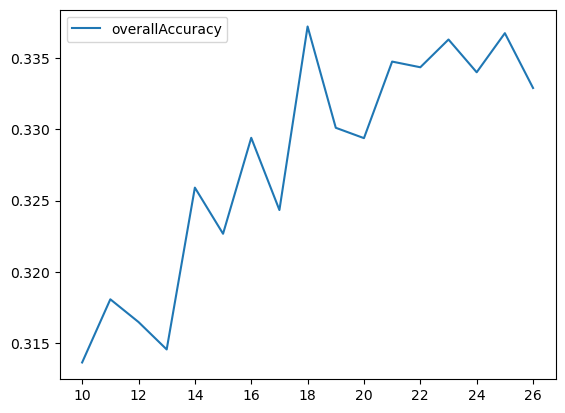

In [57]:
# View plot
overallAccuracy_kMeansDF.plot()

*As we can see, the accuracy is best around 26 clusters and levels out there at
approximately 34%. In other words, for any given cluster, the mostfrequently
occurring label for that cluster applies to approximately 34% of
the borrowers. The remaining 66% of the borrowers have labels that are not
the most-frequently occurring.*

In [58]:
accuracyByLabel_kMeans

0     0.218605
1     0.406038
2     0.306546
3     0.287630
4     0.408418
5     0.275862
6     0.305808
7     0.297939
8     0.252500
9     0.320737
10    0.248588
11    0.283893
12    0.229299
13    0.236413
14    0.194444
15    0.370885
16    0.344538
17    0.361277
18    0.245614
19    0.319594
20    0.268229
21    0.313889
22    0.387915
23    0.500000
24    0.355740
25    0.301205
dtype: float64

*The accuracy varies quite a bit cluster to cluster. Some clusters are much
more homogeneous than others. For example, cluster 23 has an accuracy of
50%, while cluster 12 has an accuracy of just 22%. This is a starting point to
build a clustering application to automatically assign new borrowers that
apply for a Lending Club loan into a preexisting group based on how similar
they are to other borrowers. Based on this clustering, it is possible to
automatically assign a tentative numerical loan grade to the new borrower,
which will be correct approximately 34% of the time.
This is not the best possible solution, and we should consider whether
acquiring more data, performing more feature engineering and selection,
selecting different parameters for the k-means algorithm, or changing to a
different clustering algorithm will improve the results. It is possible that we
do not have enough data to meaningfully separate the borrowers into distinct
and homogeneous groups more than we have already; if this is the case, more
data and more feature engineering and selection are required. Or, it could be
that, for the limited data that we have, k-means is not best for performing this
separation.
Let’s switch to hierarchical clustering to see if*

**HIERARCHICAL CLUSTERING APPLICATION**

In [59]:
Z = fastcluster.linkage_vector(scaled_X_train_PCA, method='ward', metric='euclidean')
Z_dataFrame = pd.DataFrame(data=Z,columns=['clusterOne', 'clusterTwo','distance','newClusterSize'])

In [60]:
# View bottom most leaves
Z_dataFrame[:20]

,clusterOne,clusterTwo,distance,newClusterSize
0,39786.0,39787.0,0.000000e+00,2.0
1,39788.0,42542.0,0.000000e+00,3.0
2,42538.0,42539.0,0.000000e+00,2.0
3,42540.0,42544.0,0.000000e+00,3.0
4,42543.0,42545.0,0.000000e+00,6.0
5,42541.0,42546.0,1.999059e-16,7.0
6,33251.0,33261.0,1.561313e-01,2.0
7,23848.0,24281.0,1.686781e-01,2.0
8,14048.0,23681.0,1.707782e-01,2.0
9,15613.0,19651.0,1.805186e-01,2.0


In [61]:
# View top most leaves
Z_dataFrame[42521:]

,clusterOne,clusterTwo,distance,newClusterSize
42521,85036.0,85052.0,123.910673,8151.0
42522,84921.0,85013.0,128.983973,82.0
42523,84989.0,85032.0,137.211256,1347.0
42524,84999.0,85044.0,139.015109,1479.0
42525,85050.0,85055.0,140.298878,2473.0
42526,85025.0,85030.0,145.201411,2332.0
42527,85051.0,85058.0,158.995565,6021.0
42528,85040.0,85064.0,160.549589,2264.0
42529,85065.0,85070.0,168.466279,3611.0
42530,85049.0,85063.0,169.552440,12523.0


In [62]:
distance_threshold = 100
clusters = fcluster(Z, distance_threshold, criterion='distance')
X_train_hierClustered = pd.DataFrame(data=clusters, index=X_train.index,columns=['cluster'])

In [63]:
# Show number of clusters created
print("Number of distinct clusters: ", len(X_train_hierClustered['cluster'].unique()))

Number of distinct clusters:  30


In [64]:
# Show overall accuracy
countByCluster_hierClust, countByLabel_hierClust, countMostFreq_hierClust, accuracyDF_hierClust, overallAccuracy_hierClust, accuracyByLabel_hierClust = analyze_cluster(X_train_hierClustered, y_train)

print("Overall accuracy from hierarchical clustering: ", overallAccuracy_hierClust)

Overall accuracy from hierarchical clustering:  0.35400310281604064


In [65]:
# Show accuracy by cluster
print("Accuracy by cluster for hierarchical clustering")
accuracyByLabel_hierClust

Accuracy by cluster for hierarchical clustering


0     0.312500
1     0.207792
2     0.357073
3     0.289644
4     0.355027
5     0.395722
6     0.328440
7     0.225554
8     0.247444
9     0.233361
10    0.247878
11    0.307516
12    0.331427
13    0.245855
14    0.456888
15    0.333333
16    0.315593
17    0.289389
18    0.273077
19    0.259779
20    0.286713
21    0.256737
22    0.374115
23    0.379285
24    0.571995
25    0.236967
26    0.222711
27    0.463795
28    0.500000
29    0.325000
dtype: float64

*The overall accuracy is approximately 35%, a bit same as with k-means
clustering. That being said, hierarchical clustering works differently than kmeans
and may group some borrowers more accurately than k-means, while
k-means may group other borrowers more accurately than hierarchical
clustering.
In other words, the two clustering algorithms may complement each other,
and this is worth exploring by ensembling the two and assessing the
ensemble’s results compared to the results of either standalone solution. As
with k-means, the accuracy varies quite a bit across the clusters. Some
clusters are much more homogeneous than others:*

**HDBSCAN APPLICATION**

In [67]:
 from sklearn.cluster import HDBSCAN

In [69]:
min_cluster_size = 20
min_samples = 20
alpha = 1.0
cluster_selection_method = 'leaf'

hdb = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, alpha=alpha, cluster_selection_method=cluster_selection_method)

X_train_hdbscanClustered = hdb.fit_predict(scaled_X_train_PCA)
X_train_hdbscanClustered = pd.DataFrame(data= X_train_hdbscanClustered, index=X_train.index, columns=['cluster'])

countByCluster_hdbscan, countByLabel_hdbscan, countMostFreq_hdbscan, accuracyDF_hdbscan, overallAccuracy_hdbscan, accuracyByLabel_hdbscan = analyze_cluster(X_train_hdbscanClustered, y_train)

In [70]:
# Show overall accuracy
print("Overall accuracy from HDBSCAN: ", overallAccuracy_hdbscan)

Overall accuracy from HDBSCAN:  0.3286634384843214


In [71]:
# Count by cluster
print("Cluster results for HDBSCAN:", countByCluster_hdbscan)

Cluster results for HDBSCAN:    cluster  clusterCount
0       -1         29933
1        7          7559
2        1          2076
3        4          1609
4        8           768
5        5           269
6        3           217
7        6            58
8        2            29
9        0            24


In [72]:
accuracyByLabel_hdbscan

0    0.286072
1    0.416667
2    0.300578
3    0.344828
4    0.354839
5    0.335612
6    0.297398
7    0.310345
8    0.496097
9    0.403646
dtype: float64

*Among these clusters, the accuracy ranges from 28% to 49%.*

**CONCLUSION**

*As seen here, the overall accuracy is approximately 32%, worse than that of
either k-means or hierarchical clustering*

In [73]:
import datetime as dt
print("Completed: ", dt.datetime.now())

Completed:  2023-12-07 04:10:04.827561
